**ASSIGNMENT STARTS HERE**

**Group Members:**

1) Vaishnavi Ganesh
2) Sanjhana Rangaraj
3) Rajkumar Rajavel
4) Santhosh Kumar
5) Sai Lakshmi

>We start with web scraping entry-level luxury cars forum from https://www.edmunds.com/

In [ ]:
#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
import time
import pandas as pd
from selenium.common.exceptions import NoSuchElementException

wd = webdriver.Chrome(options=chrome_options)
wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans')

# URL of the forum
base_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"

# Function to scrape comments and dates from a page
def scrape_page(page_url):
    wd.get(page_url)
    elements = wd.find_elements(By.XPATH, "//div[@class='Comment']")
    comments = []
    dates = []

    for element in elements:
        date = element.find_element(By.TAG_NAME, "time").text
        #comment = element.find_element(By.CLASS_NAME, "Message").text
        if  element.find_elements(By.CLASS_NAME, 'userContent'):
            message = element.find_element(By.CLASS_NAME, "userContent").text
            child_msg=''
            try:
                child_msg = element.find_element(By.CLASS_NAME, 'blockquote').text
            except NoSuchElementException:
                pass
        comment = message.replace(child_msg, '').strip()
        comments.append(comment)
        dates.append(date)

    return comments, dates

# List to store all comments and dates
all_comments = []
all_dates = []

# Iterate through multiple pages
for page_number in range(325, 436):
    page_url = f"{base_url}/p{page_number}"
    print(page_url)
    comments, dates = scrape_page(page_url)
    all_comments.extend(comments)
    all_dates.extend(dates)

# Create a DataFrame to store all the comments and dates
data = {'Comment': all_comments, 'Date': all_dates}
df = pd.DataFrame(data)
print(df)


df.to_csv('Last_100_Pages.csv')
!ls
from google.colab import files
files.download("Last_100_Pages.csv")

In [ ]:
# Importing libraries

!pip install selenium
!apt-get -q update
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By

chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [498 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,064 kB]
Hit:10 https://ppa.laun

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import MDS
from itertools import product
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import statsmodels.api as sm
from scipy.stats import chisquare
from scipy.optimize import minimize_scalar
import itertools
from collections import defaultdict
from sklearn.manifold import MDS
import re
import csv

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


> We save the data we have taken from the Edmunds website in the file called "Last_100_Pages.csv" and we move forward with the tasks at hand with this data into consideration

**Task A**
> Zipf's law needs to be supported econometrically and to do that we first get the data into a dataframe

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Last_100_Pages.csv to Last_100_Pages.csv


In [3]:
df = pd.read_csv('Last_100_Pages.csv')
del df[df. columns[0]]
df.head()

,Date,Comment
0,Oct-13,"""Which gets us right back to the Acura....easy..."
1,Oct-13,"billy.....personally, I would buy my own airfi..."
2,Oct-13,I think the AWD TL is the same as the RDX and ...
3,Oct-13,Thats exactly what I did- i bought my own (par...
4,Oct-13,"If cross shopping was considered, I wonder if ..."


In [4]:
#Function to remove Punctuation

def remove_punctuation(text):
    translator = str.maketrans(' ', ' ', string.punctuation)
    return text.translate(translator)

def remove_newline(text):
  text = text.replace('\n',' ')
  return text

# Function to remove extra spaces
def remove_extra_spaces(text):
    text = ' '.join(text.split())
    return text

In [6]:
from collections import Counter

df['Comment'] = df['Comment'].astype(str)
df['Comment'] = df['Comment'].str.lower()

df['Comment'] = df['Comment'].apply(remove_punctuation)
df['Comment'] = df['Comment'].apply(remove_newline)
df['Comment'] = df['Comment'].apply(remove_extra_spaces)

# Remove entries with empty or space in 'Comment' column and reset index
df = df[df['Comment'].str.strip() != '']
df.reset_index(drop=True, inplace=True)

df['Comment'] = df['Comment'].astype(str)

# Concatenate all messages
corpus = " ".join(df['Comment'])

# Tokenize the text into words and calculate freq
words = corpus.split()
word_freq = Counter(words)

# Get the top 100 words
top_words = word_freq.most_common(100)
# top_words

[('the', 27441),
 ('a', 12722),
 ('to', 11395),
 ('and', 11041),
 ('i', 10459),
 ('of', 8364),
 ('is', 7086),
 ('in', 6651),
 ('it', 6412),
 ('that', 6391),
 ('for', 5280),
 ('with', 4321),
 ('on', 3941),
 ('you', 3844),
 ('but', 3730),
 ('my', 3546),
 ('have', 3341),
 ('be', 3234),
 ('car', 3106),
 ('not', 3068),
 ('was', 3011),
 ('as', 2962),
 ('are', 2857),
 ('at', 2811),
 ('they', 2712),
 ('or', 2578),
 ('if', 2203),
 ('an', 2133),
 ('this', 2025),
 ('so', 2021),
 ('would', 1952),
 ('like', 1906),
 ('one', 1833),
 ('cars', 1811),
 ('more', 1784),
 ('its', 1722),
 ('just', 1664),
 ('has', 1628),
 ('about', 1560),
 ('all', 1525),
 ('will', 1509),
 ('new', 1476),
 ('bmw', 1469),
 ('get', 1443),
 ('had', 1441),
 ('than', 1425),
 ('from', 1417),
 ('can', 1411),
 ('me', 1399),
 ('what', 1365),
 ('we', 1285),
 ('up', 1276),
 ('no', 1242),
 ('out', 1229),
 ('audi', 1215),
 ('some', 1205),
 ('think', 1191),
 ('there', 1189),
 ('when', 1179),
 ('even', 1158),
 ('do', 1118),
 ('their', 1079),

<ipython-input-13-de666616684a>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=plot_df, x='Word', y='Frequency', color='teal', ci=None)


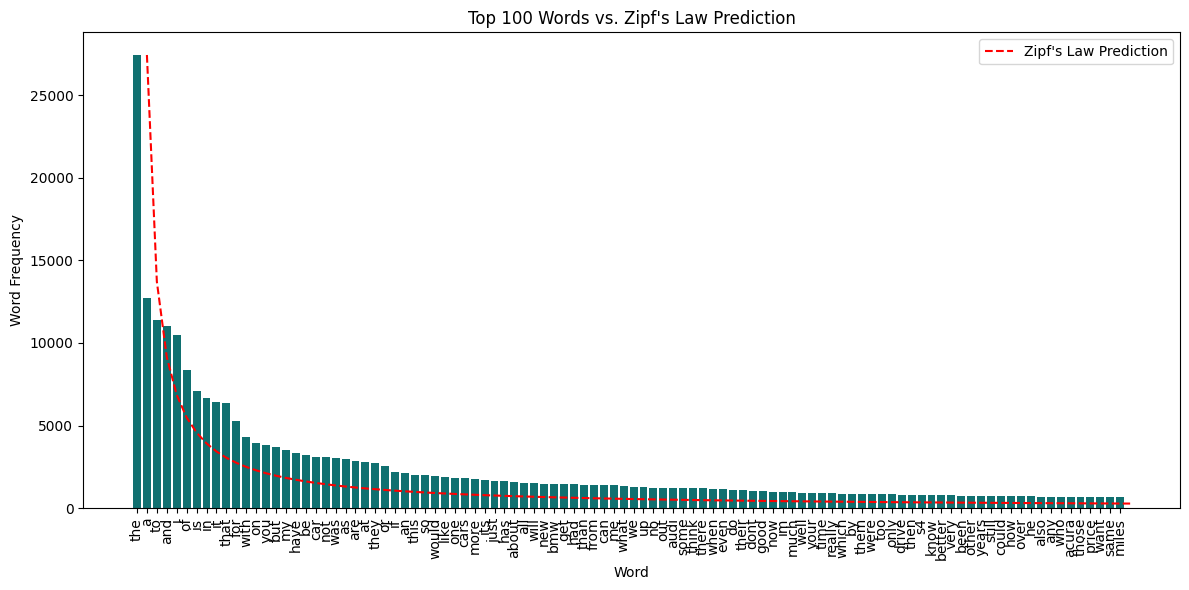

In [ ]:
# Create a DataFrame with necessary columns for plotting
plot_df = pd.DataFrame({'Word': [word[0] for word in top_words], 'Frequency': [word[1] for word in top_words]})

# Calculate the rank of each word
plot_df['Rank'] = range(1, len(plot_df) + 1)

# Calculating the theoretical prediction of Zipf's law
max_frequency = plot_df['Frequency'].max()
zipf_prediction = [max_frequency / rank for rank in plot_df['Rank']]

plt.figure(figsize=(12, 6))

ax = sns.barplot(data=plot_df, x='Word', y='Frequency', color='teal', ci=None)
plt.plot(plot_df['Rank'], zipf_prediction, color='red', linestyle='--', label='Zipf\'s Law Prediction')
plt.xlabel('Word')
plt.ylabel('Word Frequency')
plt.title('Top 100 Words vs. Zipf\'s Law Prediction')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

100


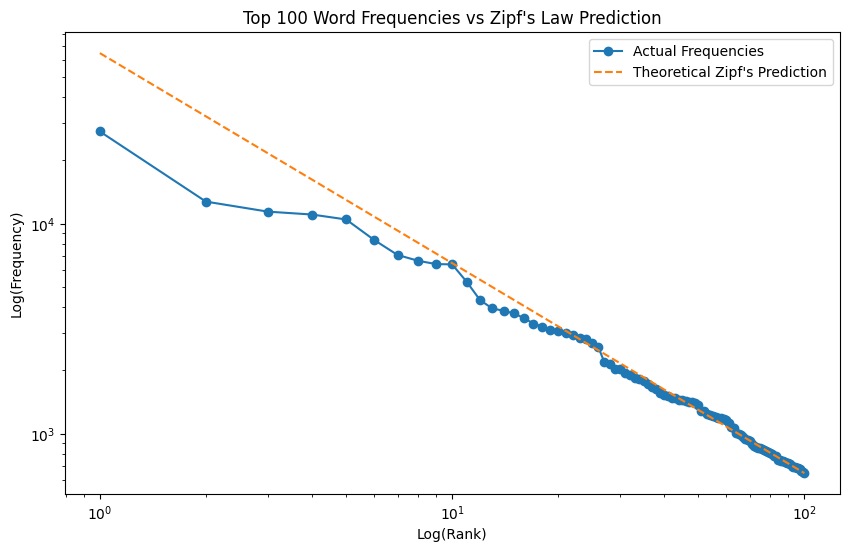

In [7]:
from numpy.ma.core import log

#### Test

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Word': [word[0] for word in top_words], 'Frequency': [word[1] for word in top_words]})
plot_df = plot_df.head(100)
ranks = np.arange(1,len(plot_df)+1)

# freq = pd.series(plot_df['Frequency'])


# word_frequencies =  plot_df['Frequency'].squeeze()
# word_frequencies_100 = freq.head(100)


# ranks = np.arange(1,len(plot_df)+1)

plot_df['ranks'] = ranks
print(plot_df['ranks'].iloc[-1])
zipf_const = plot_df['ranks'].iloc[-1] * plot_df['Frequency'].iloc[-1]
theoretical_freq = zipf_const / ranks

# Plot the actual frequencies vs theoretical frequencies
plt.figure(figsize=(10, 6))
plt.plot(plot_df['ranks'][0:100], plot_df['Frequency'][0:100], marker='o', label="Actual Frequencies")
plt.plot(plot_df['ranks'][0:100], theoretical_freq, linestyle='--', label="Theoretical Zipf's Prediction")
plt.xscale('log')
plt.yscale('log')
plt.title("Top 100 Word Frequencies vs Zipf's Law Prediction")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.legend()
plt.show()

# Plot the actual frequencies vs theoretical frequencies
# plt.figure(figsize=(10, 6))
# plt.plot(ranks, freq, marker='o', label="Actual Frequencies", color = 'maroon')
# plt.plot(ranks, theoretical_freq, linestyle='--', label="Theoretical Zipf's Prediction")
# plt.xscale('log')
# plt.yscale('log')
# plt.title("Top 100 Word Frequencies vs Zipf's Law Prediction")
# plt.xlabel("Log(Rank)")
# plt.ylabel("Log(Frequency)")
# plt.legend()
# plt.show()


> After plotting the frequency count, we visualized it using a log-log plot. This shows that the frequencies of the words in our data set closely follow the theoretical Zipf's predicted frequency, barring a few words which are mostly a set of articles and propositions.

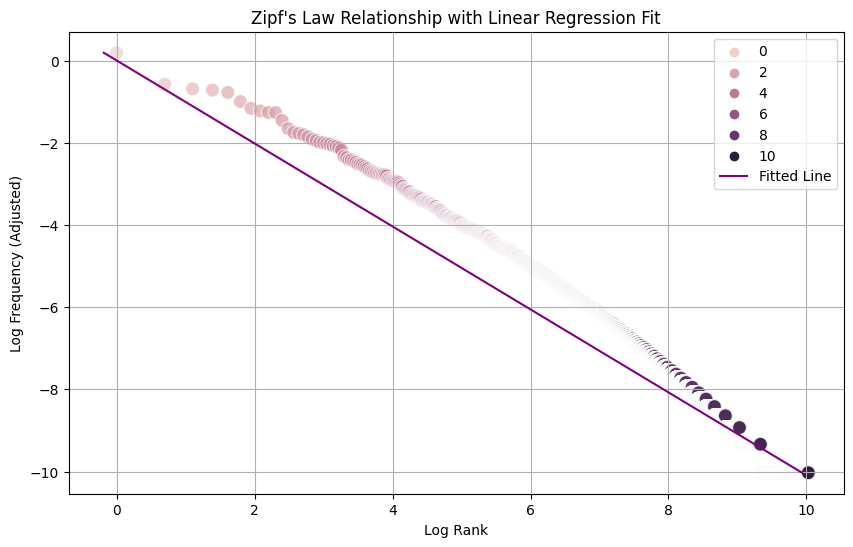

In [8]:
# Testing if the data supports Zipf's law econometrically

zipfs_testing = pd.DataFrame({'ranks': list(range(1, len(word_freq.most_common()) + 1)),'frequency':[word[1] for word in word_freq.most_common()]})
zipfs_testing['log_rank'] = np.log(zipfs_testing['ranks'])
zipfs_testing['log_frequency_adjusted'] = np.log(zipfs_testing['frequency'] / (zipfs_testing['ranks'].iloc[-1] * zipfs_testing['frequency'].iloc[-1]))

X=zipfs_testing[['log_frequency_adjusted']]
Y=zipfs_testing[['log_rank']]

# Create a LinearRegression model
model = LinearRegression(fit_intercept=False)
model.fit(X, Y)
coef = model.coef_[0]
intercept = model.intercept_

# Create a scatter plot of the original data points using a Seaborn colormap
plt.figure(figsize=(10, 6))
sns.scatterplot(data=zipfs_testing, x='log_rank', y='log_frequency_adjusted', hue='log_rank', s=100, alpha=0.7)

# Plot the fitted regression line
plt.plot( model.predict(X),X, color='purple', label='Fitted Line')

plt.xlabel('Log Rank')
plt.ylabel('Log Frequency (Adjusted)')
plt.title('Zipf\'s Law Relationship with Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Define your hypothesized value
hypothesized_value = -1

# Error calculation
standard_error_of_residuals = (((Y - model.predict(X))**2).mean()**0.5).item()
sum_of_squared_deviation_of_X_from_mean = np.sum((X - X.mean())**2).item()
standard_error = standard_error_of_residuals / np.sqrt(sum_of_squared_deviation_of_X_from_mean)

z_statistic = (coef[0] - hypothesized_value) / standard_error
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print("Z-statistic = ", z_statistic)
print("p-Value = ", p_value)
print("Co-efficient = ", coef.item())

z-Statistic: 4.643495709324077
P-Values: 3.425631100117954e-06
Co-efficient Value: -0.9909254560387498


> Based on the statistical analysis of the data set we can make the following obervations:

> 1. Z-statistic: The positive Z-statistic of 4.64 suggests that the scaling exponent(s) is greater than -1. This is in adherence to the expectation of Zipf’s law where is is typically close to -1

> 2. p-value: The extremely small p-value of 0.0000035 indicates that the observed deviation from the hypothesized -1 scaling exponent is statistically significant. The data provides strong evidence against the null hypothesis (data set does not follow Zipf’s law)

> 3. Co-efficient: The estimated co-efficient of -0.9909 is very close to -1. The data set aligns with the scaling exponent thus supporting the Zipf’s law

> The positive Z-statistic, low p-value, and the close proximity of the coefficient to -1 all point towards the data set exhibiting Zipfian characteristics, where a small number of elements have very high frequency, and most elements are rare, which is a fundamental characteristic of Zipf's Law. This suggests that the data set follows Zipf's Law econometrically.

**Task B**

> Using tokenization to get the words and their counts:

In [10]:
all_reviews_text = ' '.join(df['Comment'].tolist())
words = word_tokenize(all_reviews_text)
freq_dist = FreqDist(words)
freq_dist

FreqDist({'the': 27447, 'a': 12724, 'to': 11396, 'and': 11041, 'i': 10515, 'of': 8364, 'is': 7086, 'in': 6653, 'it': 6453, 'that': 6416, ...})

> We have to make sure to replace all the model names with the brand names, so that we capture the count of brand mentions in the comments and for that we have a csv that has the model names and correspodning brand names

In [12]:
from google.colab import files
uploaded = files.upload()

Saving car_models_and_brands.csv to car_models_and_brands.csv


In [13]:
csv_file_path = 'car_models_and_brands.csv'

# Create an empty dictionary to store the data
brand_model = {}

# Open and read the CSV file
with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    # Iterate through the CSV rows and convert to dictionary entries
    for row in csv_reader:
        brand = row[0]
        model = row[1]
        brand_model[model] = brand

# Print the resulting dictionary
# print(brand_model)

{'integra': 'acura', 'legend': 'honda', 'vigor': 'acura', 'rlx': 'acura', 'ilx': 'acura', 'mdx': 'acura', 'rdx': 'acura', 'tsx': 'acura', 'rsx': 'acura', 'quattro': 'audi', 'a4': 'audi', 'a6': 'audi', 'a5': 'audi', 'a7': 'audi', 'q3': 'audi', 'q5': 'audi', 'q7': 'audi', 'a8': 'audi', 'a3': 'audi', '2.0t': 'audi', '3-series': 'bmw', '5-series': 'bmw', '6-series': 'bmw', '4-series': 'bmw', 'xdrive': 'bmw', 'alpina': 'bmw', '330ci': 'bmw', '328i': 'bmw', '325is,': 'bmw', '330c': 'bmw', '335i': 'bmw', '335d': 'bmw', '525i': 'bmw', '528i': 'bmw', '535i': 'bmw', '128i': 'bmw', '640i': 'bmw', '3er': 'bmw', '5er': 'bmw', 'm5': 'bmw', 'm3': 'bmw', 'm6': 'bmw', 'bmws': 'bmw', 'bmwesque': 'bmw', 'park avenue': 'buick', 'la crosse': 'buick', 'lacrosse': 'buick', 'century': 'toyota', 'enclave': 'buick', 'encore': 'buick', 'regal': 'buick', 'buicks': 'buick', 'escalade': 'cadillac', 'srx': 'cadillac', 'xts': 'cadillac', 'cars': 'car', 'grand blazer': 'chevrolet', 'trailblazer': 'chevrolet', 'silvera

> After importing the csv as a dictionary, we use that to replace the model names in the dictionary that we created with word frequencies and make sure that all brand names are collated together

In [14]:
# Create a dictionary to store the updated frequency distribution
updated_freq_dist = defaultdict(int)

# Iterate through the items in the freq_dist dictionary
for word, frequency in freq_dist.items():
    # Check if the word is a model in the brand_model dictionary
    if word in brand_model:
        # If it is a model, get the corresponding brand
        brand = brand_model[word]
        # Add the frequency to the corresponding brand in the updated_freq_dist dictionary
        updated_freq_dist[brand] += frequency
    else:
        # If it is not a model, keep the word as it is
        updated_freq_dist[word] += frequency

# Convert the updated_freq_dist dictionary back to a regular dictionary
updated_freq_dist = dict(updated_freq_dist)

# Print the updated frequency distribution
print(updated_freq_dist)

{'which': 877, 'gets': 139, 'us': 507, 'right': 466, 'back': 600, 'to': 11396, 'the': 27447, 'acuraeasypeezy': 1, 'on': 3941, 'reliability': 139, 'and': 11041, 'maintenance': 142, 'really': 887, 'my': 3549, 'dealer': 647, 'wants': 73, '198': 1, 'tax': 44, 'for': 5281, 'a12': 4, 'service': 327, 'is': 7086, 'basically': 81, 'oil': 333, 'filter': 32, 'as': 2963, 'well': 943, 'air': 45, 'cleaner': 11, 'rest': 47, 'gimmicky': 2, 'check': 113, 'balances': 2, 'eye': 38, 'checking': 16, 'a': 12724, 'box': 30, 'this': 2025, 'tl': 369, 'awd': 403, 'billypersonally': 1, 'i': 10515, 'would': 1953, 'buy': 404, 'own': 238, 'airfilter': 1, 'install': 10, 'it': 6453, 'what': 1372, 'that': 6416, 'cost': 386, '1520': 1, 'maybe': 353, 'changesiirc': 1, 'when': 1179, 'had': 1441, 'send': 25, 'out': 1229, 'coupons': 3, '4995': 3, 'change': 252, 'tire': 171, 'rotation': 16, 'some': 1205, 'visual': 2, 'inspections': 3, 'forget': 27, 'does': 455, 'entail': 1, 'think': 1192, 'same': 659, 'acura': 1104, 'they':

> Now that we have the updated word-frequency dictionary, we count the brands that we are focussing on and get their counts

In [15]:
brands_to_count = ['acura', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'honda', 'hyundai', 'infiniti', 'kia', 'lexus', 'lincoln', 'mazda', 'mercedes', 'mercury', 'mitsubishi', 'nissan', 'pontiac', 'saturn', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo', 'fiat', 'jaguar', 'land rover', 'mini', 'smart', 'tesla', 'alfa romeo', 'maserati', 'genesis', 'aston martin', 'mclaren', 'bugatti', 'koenigsegg', 'pagani', 'rolls-royce', 'bentley', 'lamborghini']

# Create a new dictionary to store the counts of the specified brands
brand_counts_updated = {}

# Iterate through the brands in brands_to_count
for brand in brands_to_count:
    # Check if the brand is in the freq_dist dictionary
    if brand in updated_freq_dist:
        # If it is in freq_dist, add it to the brand_counts dictionary
        brand_counts_updated[brand] = updated_freq_dist[brand]
    else:
        # If it is not in freq_dist, set its count to 0
        brand_counts_updated[brand] = 0

# Print the brand counts
# display(brand_counts_updated)

> Now that we have the brand names and the number of times they were mentioned, we look for the top 10 brands that have the most mentions:

In [16]:
import heapq
brand_counts_updated = dict(sorted(brand_counts_updated.items(), key=lambda item: item[1], reverse=True))
top_10 = dict(heapq.nlargest(10, brand_counts_updated.items(), key=lambda item: item[1]))
top_10_brands=list(top_10.keys())
top_10

top_10_df = pd.DataFrame({'Brand': list(top_10.keys()), 'Counts': list(top_10.values())})
# display(top_10_df)

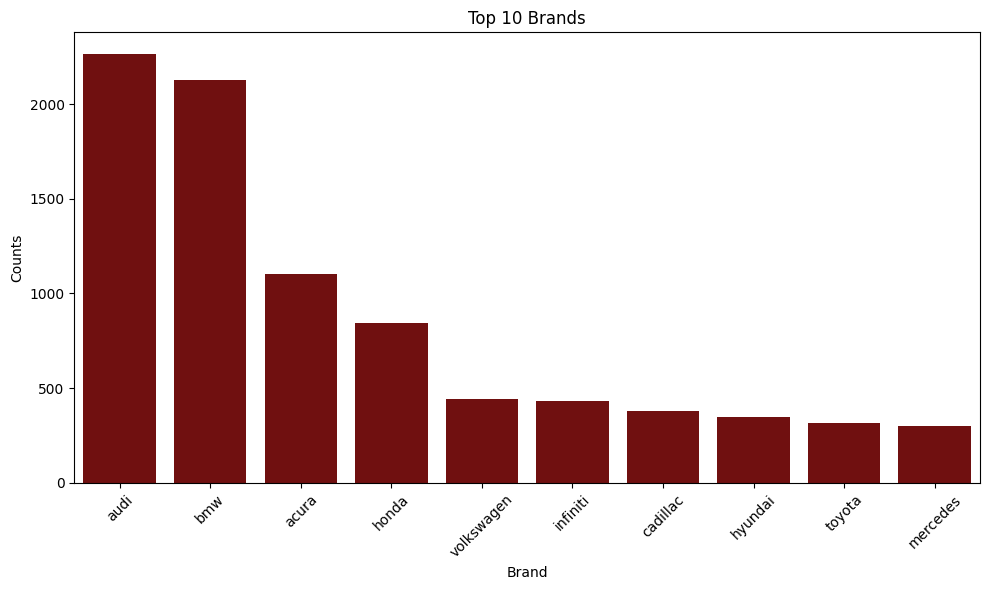

In [17]:
# Plot the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_df.head(10), x='Brand', y='Counts', color='maroon')
plt.xlabel('Brand')
plt.ylabel('Counts')
plt.title('Top 10 Brands')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Task C**

> Though we have a word frequency table, we have to go through each comment to see if 2 brands are mentioned and if there are 5 number of words between the brands, and calculate the co-occurence correspondingly, so we tokenize comment by comment and store it.

In [18]:
# Open and read the CSV file

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
total_comments = 0
comments = []  # Store tokenized comments

with open('Last_100_Pages.csv', mode='r', newline='', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)

    # Skip the header row if it exists
    next(csv_reader, None)

    # Iterate through the rows and tokenize the comments
    for row in csv_reader:
        comment = row[2]  # Assuming the comments are in the third column
        total_comments += 1

        # Tokenize the comment text, splitting on spaces and removing commas
        tokens = comment.split()
        filtered_tokens = [token.replace(',', '') for token in tokens if token.lower() not in stop_words]

        comments.append(filtered_tokens)  # Store the tokenized comment

# print(comments)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


> In each comment, we now replace the model names with brand names

In [19]:
# Iterate through the comments list and replace words
for i, comment_tokens in enumerate(comments):
    for j, token in enumerate(comment_tokens):
        # Check if the token is in the brand_model dictionary keys
        if token.lower() in brand_model:
            # Replace the token with the corresponding value
            comments[i][j] = brand_model[token.lower()]

# Now, the 'comments' list contains tokens with brand names replaced by model names
# print(comments)

> We have to iterate through the comments and find brand-brand occurences and consider them if the gap between them is within 5 and then calculate the lift of the brands based on the number of such co-occurences. We simultaneously count the number of occurences of each brand which are also used in the lift calculation.

> The brand combinations and their lift values are printed with the following code:

In [20]:
# Initialize dictionaries to store support counts for each brand and lift results
support_counts = {brand: 0 for brand in top_10_brands}
lift_results = {}

# Iterate through brand pairs
for brand1, brand2 in itertools.combinations(top_10_brands, 2):
    support_ab = 0
    support_a = 0
    support_b = 0

    # Iterate through tokenized comments
    for comment_tokens in comments:
        # Check if brand1 and brand2 are mentioned in the comment
        brand1_mentioned = any(brand1.lower() in token.lower() for token in comment_tokens)
        brand2_mentioned = any(brand2.lower() in token.lower() for token in comment_tokens)

        if brand1_mentioned:
            support_a += 1
        if brand2_mentioned:
            support_b += 1

        # Calculate the number of words between positions of brand1 and brand2
        positions_a = [i for i, token in enumerate(comment_tokens) if brand1.lower() in token.lower()]
        positions_b = [i for i, token in enumerate(comment_tokens) if brand2.lower() in token.lower()]

        for position_a in positions_a:
            for position_b in positions_b:
                words_between = abs(position_a - position_b)
                if words_between <= 5:
                    support_ab += 1
                    break  # No need to check other positions for this comment

    # Calculate lift for the brand-brand pair
    if support_a > 0 and support_b > 0:
        lift = (support_ab * total_comments) / (support_a * support_b)
        lift_results[(brand1, brand2)] = lift

# Print lift ratios
# for (brand1, brand2), lift in lift_results.items():
#     print(f"Lift({brand1}, {brand2}): {lift:.2f}")

> We now put these values into a dataframe and display the combinations in descending order of lift values.

In [21]:
# Restructure the data into lists
brand1_list, brand2_list, value_list = zip(*[(key[0], key[1], value) for key, value in lift_results.items()])

# Create a DataFrame from the restructured data
lift_df = pd.DataFrame({'Brand1': brand1_list, 'Brand2': brand2_list, 'Lift': value_list})

lift_df=lift_df.sort_values(by='Lift',ascending=False)
display(lift_df.head(20))

,Brand1,Brand2,Lift
17,acura,honda,3.104732
16,bmw,mercedes,2.599753
19,acura,infiniti,2.592029
28,honda,toyota,2.503995
8,audi,mercedes,2.403149
41,cadillac,mercedes,2.231353
42,hyundai,toyota,2.154247
38,infiniti,mercedes,1.853776
3,audi,volkswagen,1.777969
35,infiniti,cadillac,1.645422


**Task D**
> Using the lift values that we just got, we create a dissimilarity matrix that will enable us to plot the brands on an MDS map

In [22]:
# Create a non-symmetric distance matrix from lift ratios
brands = list(top_10_brands)
n = len(brands)
dist_matrix = np.zeros((n, n))

for i, brand1 in enumerate(brands):
    for j, brand2 in enumerate(brands):
        if i != j:
            if (brand1, brand2) in lift_results:
                lift = lift_results[(brand1, brand2)]
                # Check if lift is zero, replace with epsilon (e.g., 1)
                if lift == 0:
                    lift = epsilon
                dist_matrix[i, j] = 1 / lift
                dist_matrix[j, i] = dist_matrix[i, j]  # Fill the corresponding symmetric value

In [23]:
# Initialize the distance matrix with zeros (or any other initial value)
n = len(top_10_brands)
dist_matrix = np.zeros((n, n))

# Small non-zero value to replace zero lift values
epsilon = 0.000001

# Iterate through brand pairs
for i, brand1 in enumerate(top_10_brands):
    for j, brand2 in enumerate(top_10_brands):
        if i != j:
            # Check if the brand pair exists in lift_results
            if (brand1, brand2) in lift_results:
                lift = lift_results[(brand1, brand2)]
                # Check if lift is zero, replace with epsilon (e.g., 1)
                if lift == 0:
                    lift = epsilon
                # Calculate distance using lift
                dist_matrix[i, j] = 1 / lift
                dist_matrix[j, i] = dist_matrix[i, j]

# Now the dist_matrix contains distances between brand pairs, with lift values equal to zero replaced by epsilon

In [24]:
dist_matrix

array([[0.        , 0.73626212, 0.72648439, 1.79726916, 0.56243953,
        0.78375032, 0.87356343, 1.98508068, 2.39184809, 0.41612067],
       [0.73626212, 0.        , 1.75363839, 3.69484761, 4.50494788,
        1.2855665 , 0.98829997, 1.79545024, 4.39034833, 0.38465193],
       [0.72648439, 1.75363839, 0.        , 0.32208901, 4.06059507,
        0.38579816, 0.7803855 , 2.25588615, 1.34907928, 1.14291349],
       [1.79726916, 3.69484761, 0.32208901, 0.        , 1.35229429,
        2.67938135, 6.19406144, 1.46498549, 0.39936177, 4.74192671],
       [0.56243953, 4.50494788, 4.06059507, 1.35229429, 0.        ,
        2.87481858, 3.32293179, 1.96480406, 1.04444848, 1.69593614],
       [0.78375032, 1.2855665 , 0.38579816, 2.67938135, 2.87481858,
        0.        , 0.60774673, 1.59712143, 2.03759071, 0.53943964],
       [0.87356343, 0.98829997, 0.7803855 , 6.19406144, 3.32293179,
        0.60774673, 0.        , 1.38455491, 2.20800073, 0.44815856],
       [1.98508068, 1.79545024, 2.2558861

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


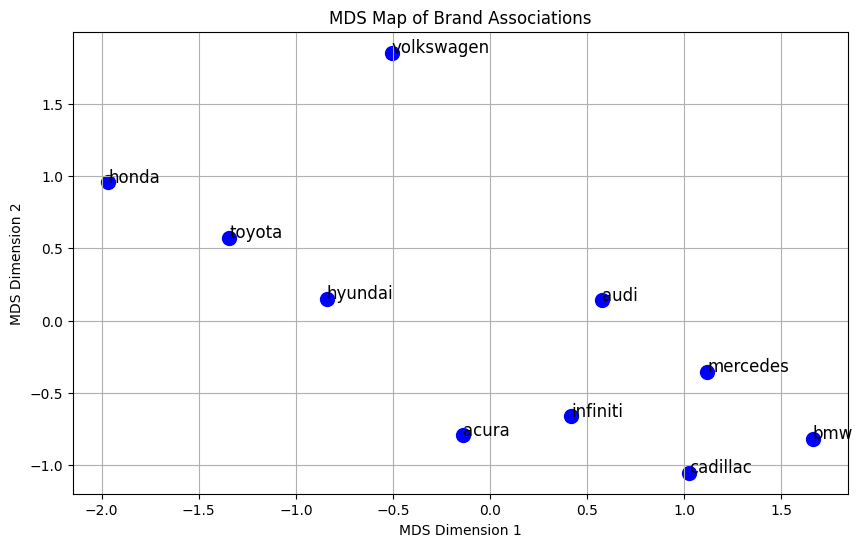

In [25]:
# Perform MDS to create a map
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
brand_map = mds.fit_transform(dist_matrix)
brands=['audi', 'bmw', 'acura', 'honda', 'volkswagen', 'infiniti', 'cadillac', 'hyundai', 'toyota', 'mercedes']
# Plot the MDS map
plt.figure(figsize=(10, 6))
plt.scatter(brand_map[:, 0], brand_map[:, 1], c='blue', s=100)

for i, brand in enumerate(brands):
    plt.annotate(brand, (brand_map[i, 0], brand_map[i, 1]), fontsize=12)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Map of Brand Associations')
plt.grid(True)
plt.show()

**Task E**
> Competitive analysis of the entry level luxury car market in the USA, based on the analysis of social media conversation (assumption - all sentiments are positive):

> Two aspects to aid interpretation of the 2x2 plot,
> -  Closeness of points - indicates higher association of the two brands (denoted by the points), i.e., the two brands were both mentioned often in the same comment
> -  Clustering of brands - certain brands are closer to each other, forming discernible groups, and there are multiple such clusters

> 1 - The pairs of Honday, Toyota and Toyota, Hyundai are mentioned together often, forming a cluster between the three of them, that is perhaps reflective of their nature of producing reliable, safe, Asian-make cars with a below-average price

> 2 - In the other discernible cluster, containing the more expensive brands. Here, Acura and Infiniti are closer to each other compared to other brands. Both of them are luxury divisions of established brands (Honda and Nissan respectively)

> 3 - Acura and Infiniti are mentioned more often with BMW, Mercedes, Cadillac, and Audi ("true" luxury brands) - could imply that people consider comparing low-end versions of such luxury brands to high-end versions of Acura and Infiniti and weigh the benefits of the cheaper but more feature-rich latter cars

> 4 - Volkswagen is not mentioned as often with other brands. People aren't confused as much when they want to consider a Volkswagen

**Task F**
> We have the lift values and the MDS mapping for brands with other brands, now we want to understand the attributes of cars that are mentioned more frequently and see what brands are associated with those attributes. To achieve the above task, we first have to find the most frequently mentioned attributes, and to do that we consider the comments list and find the frequency of all words - where stopwords are not included.

In [54]:
tokenized_arrays = [[token for token in sub_array if token.isalnum()] for sub_array in comments]
combined_list = [token for sub_list in tokenized_arrays for token in sub_list if token.isalnum()]

# print(combined_list)

In [55]:
freq_dist_attrib = FreqDist(combined_list)
# freq_dist_attrib

In [56]:
for key, value in freq_dist_attrib.items():
    if not isinstance(value, (list, tuple)):
        freq_dist_attrib[key] = [value]

csv_file_path = 'words_without_stopwords.csv'
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = freq_dist_attrib.keys()  # Extract field names from dictionary keys
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Write the data rows
    for row_data in zip(*freq_dist_attrib.values()):
        writer.writerow(dict(zip(fieldnames, row_data)))

> Now we download a CSV file which contains the words and their frequencies. From this file we find the top attributes that are mentioned among all other words and feed it into the code below so that we can find the top 5 attribute mentions and then calculate the lift value of those attributes with the top 10 brands

In [57]:
p_metrics=['price','performance','speed','service','class']
b_p_metrics=top_10_brands+p_metrics
#display(b_p_metrics)

# Create a new dictionary to store the counts of the specified brands
p_counts = {}

# Iterate through the brands in brands_to_count
for brand in p_metrics:
    # Check if the brand is in the freq_dist dictionary
    if brand in updated_freq_dist:
        # If it is in freq_dist, add it to the brand_counts dictionary
        p_counts[brand] = updated_freq_dist[brand]
    else:
        # If it is not in freq_dist, set its count to 0
        p_counts[brand] = 0

# Print the brand counts
sorted_p_counts = dict(sorted(p_counts.items(), key=lambda item: item[1], reverse=True))
#print(sorted_p_counts)
first_5_attributes = list(sorted_p_counts.keys())[:5]
print(first_5_attributes)

['price', 'performance', 'service', 'class', 'speed']


> To make sure we capture all metrics to see how each brand is associated with different metrics, we calculate the lift for all the mentioned attributes

In [53]:
# Initialize dictionaries to store support counts for each brand and lift results
support_counts = {brand: 0 for brand in b_p_metrics}
lift_results = {}

# Iterate through brand pairs
for brand1, brand2 in itertools.combinations(b_p_metrics, 2):
    support_ab = 0
    support_a = 0
    support_b = 0

    # Iterate through tokenized comments
    for comment_tokens in comments:
        # Check if brand1 and brand2 are mentioned in the comment
        brand1_mentioned = any(brand1.lower() in token.lower() for token in comment_tokens)
        brand2_mentioned = any(brand2.lower() in token.lower() for token in comment_tokens)

        if brand1_mentioned:
            support_a += 1
        if brand2_mentioned:
            support_b += 1

        # Calculate the number of words between positions of brand1 and brand2
        positions_a = [i for i, token in enumerate(comment_tokens) if brand1.lower() in token.lower()]
        positions_b = [i for i, token in enumerate(comment_tokens) if brand2.lower() in token.lower()]

        for position_a in positions_a:
            for position_b in positions_b:
                words_between = abs(position_a - position_b)
                if words_between <= 5:
                    support_ab += 1
                    break  # No need to check other positions for this comment

    # Calculate lift for the brand-brand pair
    if support_a > 0 and support_b > 0:
        lift = (support_ab * total_comments) / (support_a * support_b)
        lift_results[(brand1, brand2)] = lift

# # Print lift ratios
# for (brand1, brand2), lift in lift_results.items():
#     print(f"Lift({brand1}, {brand2}): {lift:.2f}")

In [58]:
# Restructure the data into lists
brand1_list, brand2_list, value_list = zip(*[(key[0], key[1], value) for key, value in lift_results.items()])

# Create a DataFrame from the restructured data
attrib_df = pd.DataFrame({'Brand1': brand1_list, 'Brand2': brand2_list, 'Value': value_list})

# Display the DataFrame
#display(lift_df)

attrib_df=attrib_df.sort_values(by='Value',ascending=False)
# display(attrib_df)

In [59]:
lift_attributes = attrib_df[attrib_df['Brand2'].isin(p_metrics)]
lift_attributes = lift_attributes[lift_attributes['Brand1'].isin(top_10_brands)]
#display(lift_attributes)

grouped_attributes = lift_attributes.groupby('Brand2', sort=False).apply(lambda x: x.sort_values('Value', ascending=False).head(1))
#display(grouped_attributes)

group_2_attr=lift_attributes.groupby('Brand1', sort=False).apply(lambda x: x.sort_values('Value', ascending=False))
# display(group_2_attr)

group_2_attr.to_csv('lift_attribute_brand.csv')
!ls
from google.colab import files
files.download("lift_attribute_brand.csv")

car_models_and_brands.csv  sample_data
Last_100_Pages.csv	   words_without_stopwords.csv
lift_attribute_brand.csv


<ipython-input-59-8cd1a650eba7>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  group_2_attr=lift_attributes.groupby('Brand1', sort=False).apply(lambda x: x.sort_values('Value', ascending=False))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

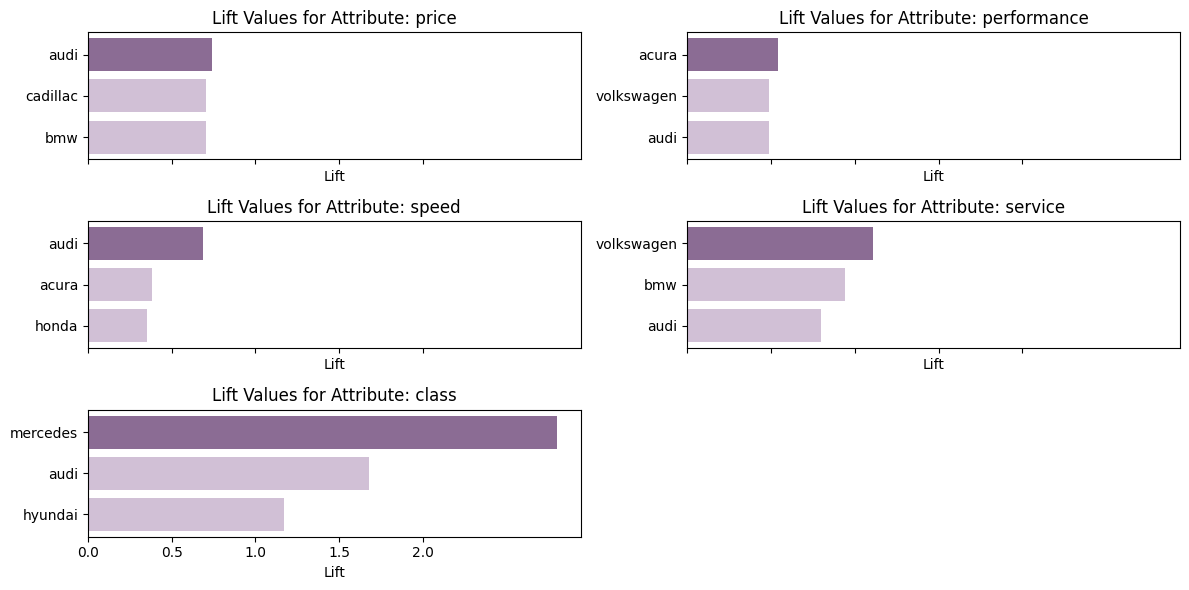

In [52]:
# Set the number of columns for subplots
num_columns = 2  # Two columns for side by side plots
# Calculate the number of rows needed based on the number of attributes and columns
num_rows = len(p_metrics) // num_columns
if len(p_metrics) % num_columns != 0:
    num_rows += 1
# Create subplots with specified columns and rows
fig, axs = plt.subplots(num_rows, num_columns, figsize=(6 * num_columns, 2 * num_rows), sharex=True)
# Flatten the axs array if there is only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)
bar_color = '#D1C0D6'
# Loop through the attributes
for attribute in p_metrics:
    # Create a DataFrame to store the data for the current attribute
    attribute_data = pd.DataFrame({'Brand': top_10_brands})
    # Extract the lift values for the current attribute and brands
    lift_values = []
    for brand in top_10_brands:
        filtered_data = group_2_attr[(group_2_attr['Brand1'] == brand) & (group_2_attr['Brand2'] == attribute)]
        lift = filtered_data['Value'].values[0]
        lift_values.append(lift)
    # Add lift values to the DataFrame
    attribute_data['Lift'] = lift_values
    # Sort the data by lift values in descending order
    attribute_data = attribute_data.sort_values(by='Lift', ascending=False)
    attribute_data = attribute_data[:3]
    # Calculate the number of rows and columns for the current attribute's subplot
    row = p_metrics.index(attribute) // num_columns
    col = p_metrics.index(attribute) % num_columns
    ax = axs[row, col]
    # Create the bar chart for the current attribute
    colors = ['#8B6C94' if Brand == attribute_data.iloc[0]['Brand'] else '#D1C0D6' for Brand in attribute_data['Brand']]
    ax.barh(attribute_data['Brand'], attribute_data['Lift'], color=colors)
    ax.set_title(f'Lift Values for Attribute: {attribute}')
    # Set x-axis label
    ax.set_xlabel('Lift')
    # Set x-axis ticks and labels
    ax.set_xticks(np.arange(0, 2.5, 0.5))  # Adjust the range and step as needed
    ax.set_xticklabels([str(x) for x in np.arange(0, 2.5, 0.5)])  # Label the ticks
    # Reverse the order of y-axis labels
    ax.invert_yaxis()
# Remove any empty subplots if the number of attributes is not a multiple of num_columns
if len(p_metrics) % num_columns != 0:
    for i in range(len(p_metrics), num_columns * num_rows):
        fig.delaxes(axs.flatten()[i])
# Set common x-axis label
plt.xlabel('Lift')
plt.tight_layout()
plt.show()

**Task G**
> Out of the 8 attributes we identified, *Luxury, Premium, Class, Service, and Price* are not only frequently mentioned but also exhibit strong correlations with many of the brands, as evidenced by the heatmap.

The brands that are primarily linked to these attributes are:
- *Price* - Audi, Cadillac, BMW
- *Performance* - Acura, Audi, Toyota
- *Speed* - Audi, Acura, Honda
- *Service* - Volkswagen, BMW, Audi
- *Class* - Mercedes, Audi, Hyundai

> Based on the analysis above, we can advise our clients that key factors influencing the decision to purchase a entry-level luxury car include the car's price, performance, speed, servicability, and class.

> To edge out the competition focussing on these specific attributes when marketing, will offer a strategic advantage.

**Task H**

In [60]:
# Define the list of words/phrases to replace with "aspiration"
replace_with_aspiration = [
    'dream car', 'dream of', 'aspire', 'really want', 'hope to', 'desire', 'desirable',
    'fancy', 'dream', 'cant wait to', 'wish to', 'aspire to', 'future car', 'thinking to buy',
    'love to buy', 'want to own', 'love to own', 'like to own', 'have to own', 'nice to own', 'nice to buy',
    'have to buy', 'would love to buy', 'wish to own', 'looking to buy', 'looking forward to buy', 'next car',
    'winner', 'promising', 'dream to buy', 'top car', 'would like to buy', 'would love to buy', 'eager to buy',
    'love to have', 'desire of', 'dream to', 'always wanted', 'interested', 'buy', 'love', 'crave', 'seek', 'envy',
    'pursue', 'long', 'aim', 'endeavor', 'lust', 'adore', 'strive', 'eager', 'passionate', 'obsess', 'itch',
    'pine', 'fancy', 'relish', 'imagine', 'inspired', 'infatuated', 'worship', 'keen', 'drive', 'ride', 'rave',
    'ache', 'beg', 'prized', 'ultimate', 'prime', 'essential', 'priority', 'target', 'wannabe', 'prize', 'urge',
    'enthusiastic', 'dream', 'must-have', 'luxury', 'covet', 'yearn', 'luxurious', 'top', 'best', 'elite',
    'high-end', 'premier', 'splurge', 'aspire', 'prestige', 'exclusive', 'status', 'cherish', 'desire', 'top-tier',
    'flagship', 'benchmark', 'standard', 'highly', 'pinnacle', 'wish', 'dream', 'venerate', 'admire', 'epitome',
    'symbol', 'gold', 'crème', 'quintessential', 'hallmark', 'class', 'idolize', 'legendary', 'fawn', 'swoon',
    'ultimate', 'symbol', 'represent', 'ultimate', 'dream', 'obsessed', 'thinking', 'ideal', 'dream', 'fantasize',
    'long', 'love', 'heels', 'smitten', 'awe', 'wishlist', 'pride', 'owning', 'top-notch', 'beauty',
    'showstopper', 'breath-taking', 'mesmerized'
]

# Create a regular expression pattern for matching the words/phrases to replace
pattern = r'\b(?:' + '|'.join(map(re.escape, replace_with_aspiration)) + r')\b'

# Function to replace matched words/phrases with "aspiration"
def replace_aspiration(text):
    return re.sub(pattern, 'aspiration', text)

# Extract the comment column
comments_att = df[df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']
comments_t=[]
# Initialize NLTK stopwords and add custom stopwords if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Add any custom stopwords here if necessary, e.g., stop_words.update(['custom', 'stop', 'words'])

# Tokenize, clean, and remove stopwords from the comments
def preprocess_text(text):
    # Replace words/phrases with "aspiration"
    text = replace_aspiration(text)

    # Tokenize the text
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase

    # Remove stopwords and special characters
    cleaned_words = [word for word in words if word not in stop_words and word.isalpha()]
    #print(cleaned_words)
    return cleaned_words

# Tokenize, preprocess, and clean the comments
all_cleaned_words = []
for comment in comments_att:
    cleaned_words = preprocess_text(comment)
    #print(cleaned_words)
    comments_t.append(cleaned_words)
    all_cleaned_words.extend(cleaned_words)

# Calculate word frequencies
word_frequencies = pd.Series(all_cleaned_words).value_counts()
# display(word_frequencies)
# display(comments_t)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
#

In [45]:
b_a_metrics=top_10_brands+['aspiration','wife']
display(b_a_metrics)
# Create a dictionary to track brand mentions and positions
b_a_mentions = {b_a: {'mentions': [], 'positions': []} for b_a in b_a_metrics}

['audi',
 'bmw',
 'acura',
 'honda',
 'volkswagen',
 'infiniti',
 'cadillac',
 'hyundai',
 'toyota',
 'mercedes',
 'aspiration',
 'wife']

In [46]:
#print(comments)

# Tokenize each sub-array
tokenized_arrays = [[token for token in sub_array if token.isalnum()] for sub_array in comments_t]
combined_list = [token for sub_list in tokenized_arrays for token in sub_list if token.isalnum()]

print(combined_list)

['gets', 'us', 'right', 'back', 'acuraeasypeezy', 'reliability', 'maintenance', 'really', 'dealer', 'wants', 'tax', 'service', 'basically', 'oil', 'filter', 'well', 'air', 'cleaner', 'rest', 'gimmicky', 'check', 'balances', 'basically', 'eye', 'service', 'checking', 'box', 'tl', 'awd', 'billypersonally', 'would', 'aspiration', 'airfilter', 'install', 'would', 'cost', 'maybe', 'oil', 'changesiirc', 'tl', 'dealer', 'would', 'send', 'coupons', 'oil', 'change', 'tire', 'rotation', 'visual', 'inspections', 'forget', 'service', 'entail', 'think', 'awd', 'tl', 'rdx', 'add', 'rear', 'end', 'diff', 'fluid', 'changes', 'fwd', 'version', 'obviously', 'need', 'every', 'couple', 'years', 'thats', 'exactly', 'bought', 'parts', 'take', 'mechanic', 'istallation', 'air', 'filter', 'oil', 'filter', 'change', 'maybe', 'rear', 'diff', 'dont', 'think', 'needed', 'cross', 'shopping', 'considered', 'wonder', 'mb', 'execs', 'sitting', 'around', 'pissed', 'blatant', 'cloning', 'genesis', 'said', 'lets', 'build

In [47]:
freq_dist_attrib = FreqDist(combined_list)
freq_dist_attrib

FreqDist({'aspiration': 4515, 'car': 3070, 'would': 1953, 'like': 1907, 'one': 1833, 'cars': 1814, 'bmw': 1479, 'new': 1477, 'get': 1443, 'audi': 1223, ...})

In [48]:
# Initialize dictionaries to store support counts for each brand and lift results
support_counts = {brand: 0 for brand in b_a_metrics}
lift_results = {}

# Iterate through brand pairs
for brand1, brand2 in itertools.combinations(b_a_metrics, 2):
    support_ab = 0
    support_a = 0
    support_b = 0

    # Iterate through tokenized comments
    for comment_tokens in comments_t:
        # Check if brand1 and brand2 are mentioned in the comment
        brand1_mentioned = any(brand1.lower() in token.lower() for token in comment_tokens)
        brand2_mentioned = any(brand2.lower() in token.lower() for token in comment_tokens)

        if brand1_mentioned:
            support_a += 1
        if brand2_mentioned:
            support_b += 1

        # Calculate the number of words between positions of brand1 and brand2
        positions_a = [i for i, token in enumerate(comment_tokens) if brand1.lower() in token.lower()]
        positions_b = [i for i, token in enumerate(comment_tokens) if brand2.lower() in token.lower()]

        for position_a in positions_a:
            for position_b in positions_b:
                words_between = abs(position_a - position_b)
                if words_between <= 5:
                    support_ab += 1
                    break  # No need to check other positions for this comment

    # Calculate lift for the brand-brand pair
    if support_a > 0 and support_b > 0:
        lift = (support_ab * total_comments) / (support_a * support_b)
        print(brand1, support_a)
        print(brand2, support_b)
        print(lift, support_ab)
        lift_results[(brand1, brand2)] = lift

# Print lift ratios
for (brand1, brand2), lift in lift_results.items():
    print(f"Lift({brand1}, {brand2}): {lift:.2f}")

audi 777
bmw 1035
3.385598020380629 247
audi 777
acura 479
3.1394179744910433 106
audi 777
honda 184
1.3878210508645292 18
audi 777
volkswagen 9
6.305162305162305 4
audi 777
infiniti 210
3.242654899797757 48
audi 777
cadillac 222
3.259087272600786 51
audi 777
hyundai 82
0.6920300091031798 4
audi 777
toyota 83
0.8546153726876619 5
audi 777
mercedes 178
6.535406996081154 82
audi 777
aspiration 2067
1.7021192870249473 248
audi 777
wife 283
1.6542696154003576 33
bmw 1035
acura 479
1.9566205762811009 88
bmw 1035
honda 184
0.5209357277882798 9
bmw 1035
volkswagen 9
1.183360171765969 1
bmw 1035
infiniti 210
2.586487232574189 51
bmw 1035
cadillac 222
2.6385733559646605 55
bmw 1035
hyundai 82
0.7792859667727112 6
bmw 1035
toyota 83
0.5132646528141551 4
bmw 1035
mercedes 178
6.521777126418065 109
bmw 1035
aspiration 2067
1.4375507456721566 279
bmw 1035
wife 283
0.7150338847066455 19
acura 479
honda 184
9.880378052101298 79
acura 479
volkswagen 9
2.5569473440037114 1
acura 479
infiniti 210
8.3283

In [49]:
# Restructure the data into lists
brand1_list, brand2_list, value_list = zip(*[(key[0], key[1], value) for key, value in lift_results.items()])

# Create a DataFrame from the restructured data
a_lift_df = pd.DataFrame({'Brand1': brand1_list, 'Brand2': brand2_list, 'Value': value_list})

# Display the DataFrame
display(a_lift_df)

,Brand1,Brand2,Value
0,audi,bmw,3.385598
1,audi,acura,3.139418
2,audi,honda,1.387821
3,audi,volkswagen,6.305162
4,audi,infiniti,3.242655
...,...,...,...
61,toyota,aspiration,1.542029
62,toyota,wife,0.938567
63,mercedes,aspiration,1.857509
64,mercedes,wife,0.437646


In [50]:
lift_asp = a_lift_df[a_lift_df['Brand2'].isin(['aspiration','wife'])]
#display(lift_attributes)
lift_asp = lift_asp[lift_asp['Brand1'].isin(top_10_brands)]
#display(lift_attributes)


grouped_asp = lift_asp.groupby('Brand2', sort=False).apply(lambda x: x.sort_values('Value', ascending=False))
display(grouped_asp)

Brand1      Brand2     Value
Brand2                                         
aspiration 63    mercedes  aspiration  1.857509
           43  volkswagen  aspiration  1.777617
           54    cadillac  aspiration  1.753595
           9         audi  aspiration  1.702119
           61      toyota  aspiration  1.542029
           28       acura  aspiration  1.536395
           19         bmw  aspiration  1.437551
           36       honda  aspiration  1.333212
           58     hyundai  aspiration  1.040556
           49    infiniti  aspiration  0.888808
wife       50    infiniti        wife  3.709574
           10        audi        wife  1.654270
           29       acura        wife  0.975796
           62      toyota        wife  0.938567
           20         bmw        wife  0.715034
           64    mercedes        wife  0.437646
           37       honda        wife  0.423375
           44  volkswagen        wife  0.000000
           55    cadillac        wife  0.000000
           59     hyundai        wife  0.000000

> 1. After our analysis, we found that Mercedes stands out as the most aspirational brand.

> 2. While Mercedes may not align perfectly with all attributes, it still closely matches a significant majority of these attributes, not limited to just the common ones.

> 3. When we examine the MDS map, it becomes evident that both BMW and Audi are equidistant from Mercedes, suggesting that either of them could potentially become a Mercedes customer.

> 4. Furthermore, Mercedes demonstrates a strong alignment with the categories of Class, Luxury, Old, and Price, indicating that people have confidence in Mercedes and perceive it as a brand that offers luxurious products at reasonable prices.